In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from utils import eda
import random as random
from os.path import join as pjoin

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

from utils import utils
#from utils import knn_validation
#from utils import knn_cross_validation
#from utils import nearest_prototypes

DATA_DIR = './data/'

In [16]:
#test_samples.NativeCountry = pd.Categorical(test_samples.NativeCountry)
    #print(test_samples.NativeCountry.unique())
    #train_samples.NativeCountry = pd.Categorical(train_samples, categories = test_samples.NativeCountry.unique())
    
    #print("after_Categorical")
    #print(test_samples.head(10))

In [17]:
def load_data():
    ## 0. To obtain reproducible results, we set the random seeds
    random.seed(2020)
    np.random.seed(2020)
    ## 1. Load training set

    dataset_file = pjoin(DATA_DIR, 'adult.data')
    testset_file = pjoin(DATA_DIR, 'adult.test')

    train = pd.read_csv(dataset_file, header=None, delimiter=r",\s+", engine='python')
    train.columns = [
        "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
        "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
        "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
    ]
    
    test = pd.read_csv(testset_file, header=None, delimiter=r",\s+", engine='python')
    test.columns = [
        "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
        "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
        "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
    ]
    
    return train, test

In [18]:
def data_preprocess(data,is_train):
    data = eda.Education_remove(data)
    data = eda.Capital_merge(data)
    
    data_samples = data.drop(columns="Income")
    
    data_labels = data.Income.map({"<=50K": 0, ">50K": 1})
    if is_train == False:
        data_labels = data.Income.map({"<=50K.": 0, ">50K.": 1})
    
    return data_samples,data_labels

In [19]:
def data_Categorical(data_samples):
    data_samples.WorkClass = pd.Categorical(data_samples.WorkClass)
    data_samples.MaritalStatus = pd.Categorical(data_samples.MaritalStatus)
    data_samples.Occupation = pd.Categorical(data_samples.Occupation)
    data_samples.Relationship = pd.Categorical(data_samples.Relationship)
    data_samples.Race = pd.Categorical(data_samples.Race)
    data_samples.Gender = pd.Categorical(data_samples.Gender)
    data_samples.NativeCountry = pd.Categorical(data_samples.NativeCountry)
    return data_samples

In [20]:
def preprocess(train,test):
    train_samples, train_labels = data_preprocess(train,True)
    test_samples, test_labels = data_preprocess(test,False)
    
    for col in ['WorkClass','MaritalStatus', 'Occupation', 'Relationship','Race','Gender','NativeCountry']:
        le = LabelEncoder()
        train_samples[col] = le.fit_transform(train_samples[col])
        test_samples[col] = le.transform(test_samples[col])
        
    train_samples = data_Categorical(train_samples)
    test_samples = data_Categorical(test_samples)
    
    print(train_samples.info())
    print(test_samples.info())
    print('done')
    return train_samples, train_labels, test_samples, test_labels

In [21]:
train, test = load_data()

In [22]:
train.head(10)

Age         WorkClass  fnlwgt  Education  EducationNum  \
0   39         State-gov   77516  Bachelors            13   
1   50  Self-emp-not-inc   83311  Bachelors            13   
2   38           Private  215646    HS-grad             9   
3   53           Private  234721       11th             7   
4   28           Private  338409  Bachelors            13   
5   37           Private  284582    Masters            14   
6   49           Private  160187        9th             5   
7   52  Self-emp-not-inc  209642    HS-grad             9   
8   31           Private   45781    Masters            14   
9   42           Private  159449  Bachelors            13   

           MaritalStatus         Occupation   Relationship   Race  Gender  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White    Male   
3     Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4     Married-civ-spouse     Prof-specialty           Wife  Black  Female   
5     Married-civ-spouse    Exec-managerial           Wife  White  Female   
6  Married-spouse-absent      Other-service  Not-in-family  Black  Female   
7     Married-civ-spouse    Exec-managerial        Husband  White    Male   
8          Never-married     Prof-specialty  Not-in-family  White  Female   
9     Married-civ-spouse    Exec-managerial        Husband  White    Male   

   CapitalGain  CapitalLoss  HoursPerWeek  NativeCountry Income  
0         2174            0            40  United-States  <=50K  
1            0            0            13  United-States  <=50K  
2            0            0            40  United-States  <=50K  
3            0            0            40  United-States  <=50K  
4            0            0            40           Cuba  <=50K  
5            0            0            40  United-States  <=50K  
6            0            0            16        Jamaica  <=50K  
7            0            0            45  United-States   >50K  
8        14084            0            50  United-States   >50K  
9         5178            0            40  United-States   >50K

In [23]:
train_samples, train_labels, test_samples, test_labels = preprocess(train,test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Age            32561 non-null  int64   
 1   WorkClass      32561 non-null  category
 2   fnlwgt         32561 non-null  int64   
 3   EducationNum   32561 non-null  int64   
 4   MaritalStatus  32561 non-null  category
 5   Occupation     32561 non-null  category
 6   Relationship   32561 non-null  category
 7   Race           32561 non-null  category
 8   Gender         32561 non-null  category
 9   HoursPerWeek   32561 non-null  int64   
 10  NativeCountry  32561 non-null  category
 11  CapitalChange  32561 non-null  int64   
dtypes: category(7), int64(5)
memory usage: 1.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   A

In [58]:
from sklearn.metrics import matthews_corrcoef, make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

def tune_pipe_RF(x_train,y_train,plot=True):
    print('tuning pipe...') 
    matthews = make_scorer(matthews_corrcoef)
    
    n_neighbors_list = np.unique(np.round(np.geomspace(10, 500, 5)).astype(int))
    clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=50, max_features=1)
    
    tuned_parameters =  {"n_estimators": [50,100,150],
                         "max_leaf_nodes":[25,50,75],
                         "max_features":[1,'auto',None]
                        }
    stratified_kfold = StratifiedKFold(n_splits=5,random_state=2020, shuffle=True)
    
    CV = GridSearchCV(clf, tuned_parameters,return_train_score=True,
                    cv=stratified_kfold,
                    #scoring=matthews,
                    verbose=4)
    
    
    CV.fit(x_train, y_train)
    print(CV.best_params_)
    
    df = pd.DataFrame(
        (
            dict(n_estimators=d["n_estimators"],max_leaf_nodes=d["max_leaf_nodes"],max_features=d["max_features"], error=e, std=s)
            for d, e, s in zip(
                CV.cv_results_["params"],
                CV.cv_results_["mean_test_score"],
                CV.cv_results_["std_test_score"],
            )
        )
    )
    
    #n = 4/5 * len(y_train)
    #plt.errorbar(n/df["n_neighbors"], df["error"], yerr=df["std"])
    #plt.xscale("log")
    #plt.show()
    
    print('done')
    bestn_estimators = CV.best_params_['n_estimators']
    bestmax_leaf_nodes = CV.best_params_['max_leaf_nodes']
    bestmax_features = CV.best_params_['max_features']
    RF = RandomForestClassifier(n_estimators = bestn_estimators, max_leaf_nodes = bestmax_leaf_nodes, max_features = bestmax_features)
    return RF, df

In [59]:
clf, result = tune_pipe_RF(train_samples,train_labels,plot=True)

tuning pipe...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] max_features=1, max_leaf_nodes=25, n_estimators=50 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=1, max_leaf_nodes=25, n_estimators=50, score=(train=0.837, test=0.834), total=   0.5s
[CV] max_features=1, max_leaf_nodes=25, n_estimators=50 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_features=1, max_leaf_nodes=25, n_estimators=50, score=(train=0.840, test=0.839), total=   0.4s
[CV] max_features=1, max_leaf_nodes=25, n_estimators=50 ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  max_features=1, max_leaf_nodes=25, n_estimators=50, score=(train=0.834, test=0.831), total=   0.5s
[CV] max_features=1, max_leaf_nodes=25, n_estimators=50 ..............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s


[CV]  max_features=1, max_leaf_nodes=25, n_estimators=50, score=(train=0.834, test=0.835), total=   0.5s
[CV] max_features=1, max_leaf_nodes=25, n_estimators=50 ..............
[CV]  max_features=1, max_leaf_nodes=25, n_estimators=50, score=(train=0.837, test=0.835), total=   0.4s
[CV] max_features=1, max_leaf_nodes=25, n_estimators=100 .............
[CV]  max_features=1, max_leaf_nodes=25, n_estimators=100, score=(train=0.838, test=0.835), total=   0.9s
[CV] max_features=1, max_leaf_nodes=25, n_estimators=100 .............
[CV]  max_features=1, max_leaf_nodes=25, n_estimators=100, score=(train=0.837, test=0.833), total=   0.9s
[CV] max_features=1, max_leaf_nodes=25, n_estimators=100 .............
[CV]  max_features=1, max_leaf_nodes=25, n_estimators=100, score=(train=0.838, test=0.835), total=   0.9s
[CV] max_features=1, max_leaf_nodes=25, n_estimators=100 .............
[CV]  max_features=1, max_leaf_nodes=25, n_estimators=100, score=(train=0.836, test=0.837), total=   0.8s
[CV] max_fe

[CV]  max_features=auto, max_leaf_nodes=25, n_estimators=100, score=(train=0.855, test=0.848), total=   1.4s
[CV] max_features=auto, max_leaf_nodes=25, n_estimators=100 ..........
[CV]  max_features=auto, max_leaf_nodes=25, n_estimators=100, score=(train=0.852, test=0.853), total=   1.4s
[CV] max_features=auto, max_leaf_nodes=25, n_estimators=100 ..........
[CV]  max_features=auto, max_leaf_nodes=25, n_estimators=100, score=(train=0.855, test=0.848), total=   1.4s
[CV] max_features=auto, max_leaf_nodes=25, n_estimators=100 ..........
[CV]  max_features=auto, max_leaf_nodes=25, n_estimators=100, score=(train=0.853, test=0.855), total=   1.4s
[CV] max_features=auto, max_leaf_nodes=25, n_estimators=100 ..........
[CV]  max_features=auto, max_leaf_nodes=25, n_estimators=100, score=(train=0.853, test=0.855), total=   1.4s
[CV] max_features=auto, max_leaf_nodes=25, n_estimators=150 ..........
[CV]  max_features=auto, max_leaf_nodes=25, n_estimators=150, score=(train=0.855, test=0.849), total

[CV]  max_features=None, max_leaf_nodes=25, n_estimators=100, score=(train=0.859, test=0.857), total=   5.4s
[CV] max_features=None, max_leaf_nodes=25, n_estimators=100 ..........
[CV]  max_features=None, max_leaf_nodes=25, n_estimators=100, score=(train=0.859, test=0.851), total=   4.2s
[CV] max_features=None, max_leaf_nodes=25, n_estimators=100 ..........
[CV]  max_features=None, max_leaf_nodes=25, n_estimators=100, score=(train=0.855, test=0.854), total=   5.0s
[CV] max_features=None, max_leaf_nodes=25, n_estimators=100 ..........
[CV]  max_features=None, max_leaf_nodes=25, n_estimators=100, score=(train=0.855, test=0.859), total=   5.6s
[CV] max_features=None, max_leaf_nodes=25, n_estimators=150 ..........
[CV]  max_features=None, max_leaf_nodes=25, n_estimators=150, score=(train=0.860, test=0.856), total=   7.7s
[CV] max_features=None, max_leaf_nodes=25, n_estimators=150 ..........
[CV]  max_features=None, max_leaf_nodes=25, n_estimators=150, score=(train=0.858, test=0.858), total

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  7.0min finished


{'max_features': None, 'max_leaf_nodes': 75, 'n_estimators': 100}
done


0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: Income, Length: 16281, dtype: int64
[0 0 0 ... 1 0 1]


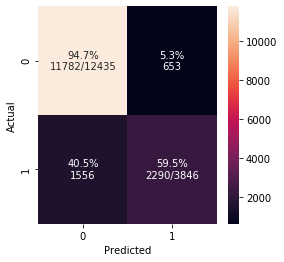

0.8643203734414348


In [60]:
import utils.analysing as AN
from sklearn.metrics import accuracy_score

def test(model,train_samples,train_labels,test_samples,test_labels):
    model.fit(train_samples,train_labels)
    pred = model.predict(test_samples)
    AN.plot_confusion_matrix(test_labels,pred)
    print(accuracy_score(test_labels,pred))

test(clf,train_samples,train_labels,test_samples,test_labels)

In [61]:
result

n_estimators  max_leaf_nodes max_features     error       std
0             50              25            1  0.834802  0.002404
1            100              25            1  0.833512  0.003312
2            150              25            1  0.830933  0.003233
3             50              50            1  0.839808  0.001632
4            100              50            1  0.837904  0.002371
5            150              50            1  0.839010  0.000913
6             50              75            1  0.841713  0.001413
7            100              75            1  0.843432  0.001633
8            150              75            1  0.843187  0.002299
9             50              25         auto  0.851540  0.002656
10           100              25         auto  0.851940  0.003052
11           150              25         auto  0.852830  0.003023
12            50              50         auto  0.857713  0.003115
13           100              50         auto  0.857007  0.002979
14           150              50         auto  0.856853  0.003932
15            50              75         auto  0.859095  0.004087
16           100              75         auto  0.859126  0.003304
17           150              75         auto  0.859310  0.002993
18            50              25         None  0.854888  0.001661
19           100              25         None  0.855072  0.002455
20           150              25         None  0.855441  0.002296
21            50              50         None  0.860999  0.003077
22           100              50         None  0.861521  0.002892
23           150              50         None  0.861798  0.003573
24            50              75         None  0.862013  0.002875
25           100              75         None  0.862259  0.003768
26           150              75         None  0.862197  0.002792

(array([10407.,     0., 14466.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

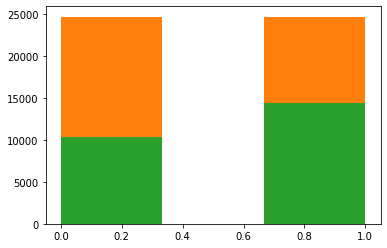

In [52]:
rus = RandomUnderSampler(random_state = 2020)
train_samples_rus, train_labels_rus = rus.fit_sample(train_samples, train_labels)

ros = RandomOverSampler(random_state = 2020)
train_samples_ros, train_labels_ros = ros.fit_sample(train_samples, train_labels)

smote_enn = SMOTEENN(random_state = 2020)
train_samples_smo, train_labels_smo = smote_enn.fit_sample(train_samples, train_labels)

plt.hist(train_labels_rus,bins = 3)
plt.hist(train_labels_ros,bins = 3)
plt.hist(train_labels_smo,bins = 3)

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: Income, Length: 16281, dtype: int64
[0 1 1 ... 1 0 1]


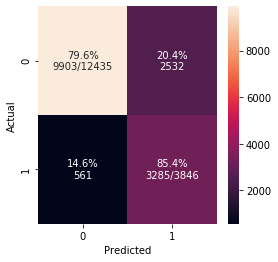

0.8100239543025612


In [62]:
test(clf,train_samples_rus,train_labels_rus,test_samples,test_labels)

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: Income, Length: 16281, dtype: int64
[0 1 1 ... 1 0 1]


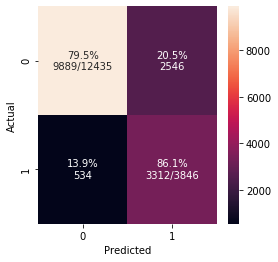

0.8108224310546035


In [63]:
test(clf,train_samples_ros,train_labels_ros,test_samples,test_labels)

In [64]:
test(clf,train_samples_smo,train_labels_smo,test_samples,test_labels)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').